## Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import re
from collections import Counter
import itertools

In [5]:
#Display full contents of a dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

## Load the dataset

In [4]:
df=pd.read_csv('C:/Users/seagu/OneDrive/Paris/ds_take_home_challenges/Conversion Rate/conversion_data.csv')

In [37]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


## Explore the dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [35]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316198.000000,316198.000000,316198.000000,316198.000000
mean,30.569311,0.685469,4.872918,0.032252
std,8.268958,0.464329,3.341053,0.176669
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,79.000000,1.000000,29.000000,1.000000


In [66]:
def check_data_unique(df):
    for column in df.columns:
        uniques = sorted(df[column].unique())
        print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])

In [67]:
check_data_unique(df)

country                  4	 ['China', 'Germany', 'UK', 'US']
age                     58	 [17, 18, 19, 20, 21]
new_user                 2	 [0, 1]
source                   3	 ['Ads', 'Direct', 'Seo']
total_pages_visited     29	 [1, 2, 3, 4, 5]
converted                2	 [0, 1]
converted_country        1	 [nan]


### Handle Age Outliers

In [36]:
df[df['age']>100]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


'age' column has max=123, which are obvious abnormal. so we need to handle those outliers. we can see, min=17, max=79, which makes sense. since we have 316200 samples, but just two outliers, we can just remove these two outliers.

In [4]:
df=df[df['age']<100]

In [8]:
#check for null value
null_df = df.isnull().sum() / df.shape[0] * 100
null_df

country                0.0
age                    0.0
new_user               0.0
source                 0.0
total_pages_visited    0.0
converted              0.0
dtype: float64

In [9]:
# Check for duplicate 
print('Duplicated value(s) in our train dataset : ', df.duplicated().sum())

Duplicated value(s) in our train dataset :  299903


## EDA

### Univariate Analysis: Boxplot, Histogram, Density Plot, Frequency Table

#### Continuous：

AGE

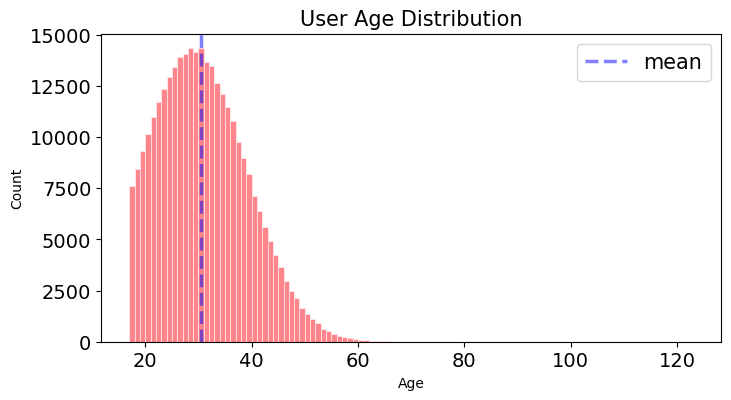

In [5]:
plt.figure(figsize=[8,4])
sns.histplot(data=df, x='age',binwidth=1,color='#FD5C64',edgecolor="white")

plt.axvline(x=df['age'].mean(),color='blue',ls='--', lw=2.5, label="mean", alpha=0.5)
plt.legend(fontsize=15)

plt.title("User Age Distribution", fontsize=15)
plt.ylabel('Count')
plt.xlabel('Age')
plt.tick_params(axis='both', which='major', labelsize=14)

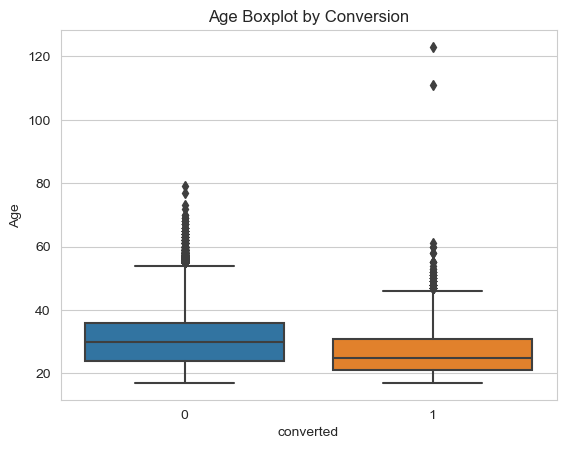

In [6]:
sns.set_style("whitegrid") 
sns.boxplot(x = 'converted', y = 'age', data = df)
plt.title("Age Boxplot by Conversion")
plt.ylabel('Age')
plt.show()

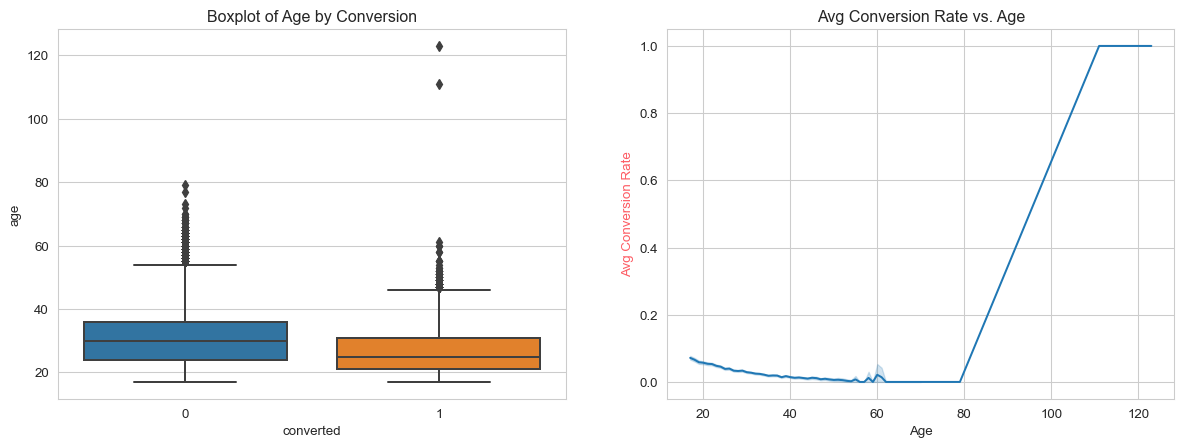

In [7]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5), dpi=96)
axs[0].set_title('Boxplot of Age by Conversion')
axs[0].set_ylabel('Age')  
# axs[0].set_xlabel('Count')

axs[1].set_title('Avg Conversion Rate vs. Age')
axs[1].set_ylabel('Avg Conversion Rate')
axs[1].set_xlabel('Age')
axs[1].yaxis.label.set_color('#FD5C64') 

ax=sns.boxplot(x = 'converted', y = 'age', data = df,ax=axs[0])

ax=sns.lineplot(x='age',y='converted',data=df,ax=axs[1])

In [18]:
df['age'].describe()

count    316198.000000
mean         30.569311
std           8.268958
min          17.000000
25%          24.000000
50%          30.000000
75%          36.000000
max          79.000000
Name: age, dtype: float64

In [21]:
df['age_bucket'] =pd.cut(df['age'],bins=[17,27,37,47,57,67,100],labels=['17-27','28-37','38-47','48-57','58-67','68+'])

<AxesSubplot:xlabel='count', ylabel='age_bucket'>

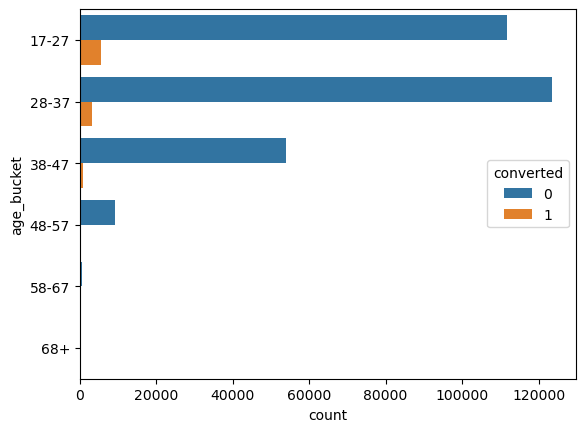

In [23]:
sns.countplot(data=df, y='age_bucket',
            hue='converted',orient='horizontal')

total_pages_visited

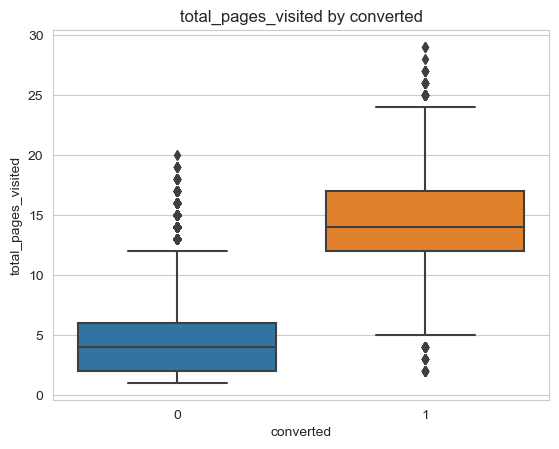

In [55]:
sns.set_style("whitegrid") 
sns.boxplot(x = 'converted', y = 'total_pages_visited', data = df)
plt.title("total_pages_visited by converted")
plt.ylabel('total_pages_visited')
plt.show()

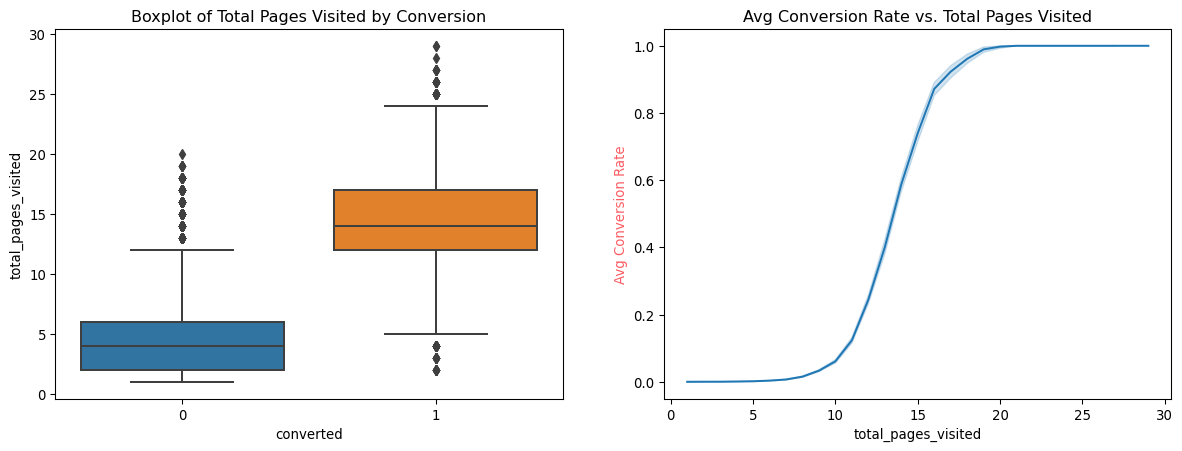

In [11]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5), dpi=96)
axs[0].set_title('Boxplot of Total Pages Visited by Conversion')
axs[0].set_ylabel('Total Pages Visited')  

axs[1].set_title('Avg Conversion Rate vs. Total Pages Visited')
axs[1].set_ylabel('Avg Conversion Rate')
axs[1].set_xlabel('total_pages_visited')
axs[1].yaxis.label.set_color('#FD5C64') 

ax=sns.boxplot(x = 'converted', y = 'total_pages_visited', data = df,ax=axs[0])

ax=sns.lineplot(x='total_pages_visited',y='converted',data=df,ax=axs[1])

#### Categorical：

 Country

In [26]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom", fontsize = 7.5)

Text(0.5, 1.0, 'User Country Distribution')

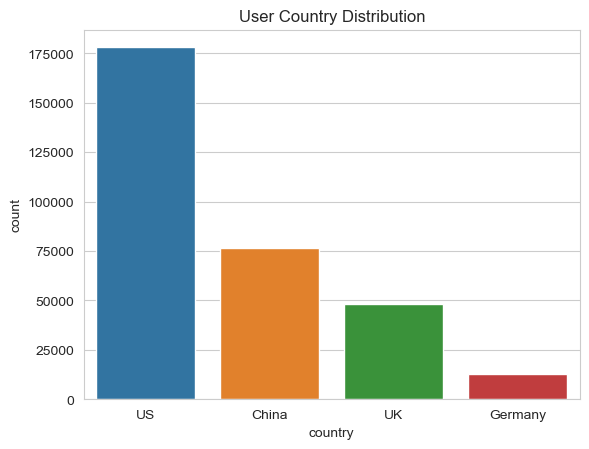

In [20]:
ax=sns.countplot(x='country',data=df,
              order = df['country'].value_counts().index)
plt.title("User Country Distribution")

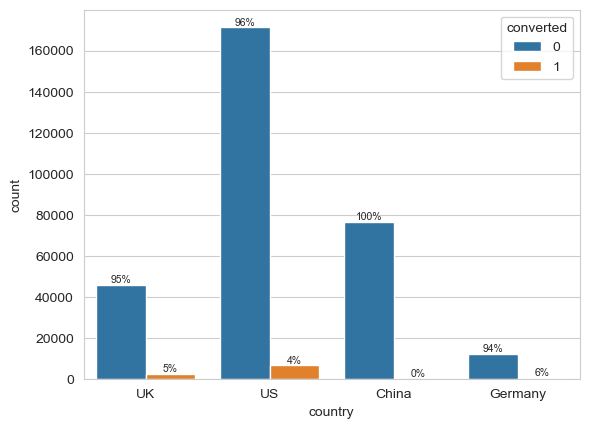

In [21]:
ax=sns.countplot(x='country',hue='converted',data=df)
barPerc(df,'country',ax)

In [40]:
#By Average conversion rate
converted_country=df.groupby('country')['converted'].mean().rename('avg_conversion').reset_index()
converted_country

,country,avg_conversion
0,China,0.001332
1,Germany,0.062428
2,UK,0.052612
3,US,0.037801


Text(0.5, 1.0, 'Average Conversion by Country')

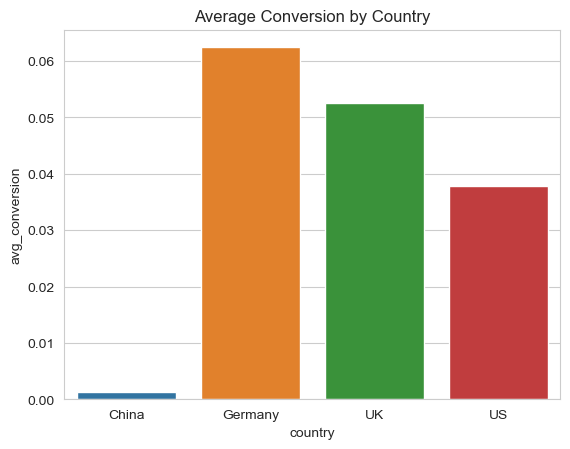

In [50]:
ax=sns.barplot(x='country',y='avg_conversion',data=converted_country)
plt.title("Average Conversion by Country")

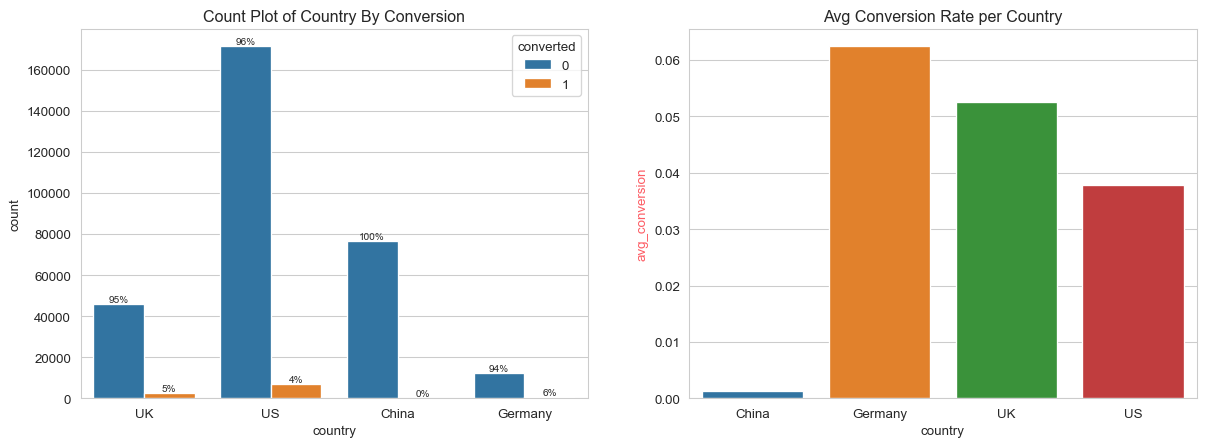

In [70]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5), dpi=96)
axs[0].set_title('Count Plot of Country By Conversion')
axs[0].set_ylabel('Country')  
axs[0].set_xlabel('Count')

axs[1].set_title('Avg Conversion Rate per Country')
axs[1].set_ylabel('Avg Conversion Rate')
axs[1].set_xlabel('User Stage')
axs[1].yaxis.label.set_color('#FD5C64') 

ax=sns.countplot(x='country',hue='converted',data=df,ax=axs[0])
barPerc(df,'country',ax)

ax=sns.barplot(x='country',y='avg_conversion',data=converted_country,ax=axs[1])

#### User Stage

Text(0.5, 1.0, 'User Stage Distribution')

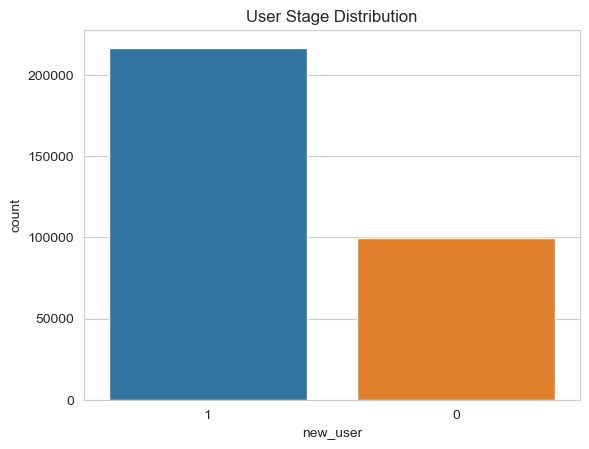

In [22]:
ax=sns.countplot(x='new_user',data=df,
              order = df['new_user'].value_counts().index)
plt.title("User Stage Distribution")

Text(0.5, 1.0, 'converted by User Stage')

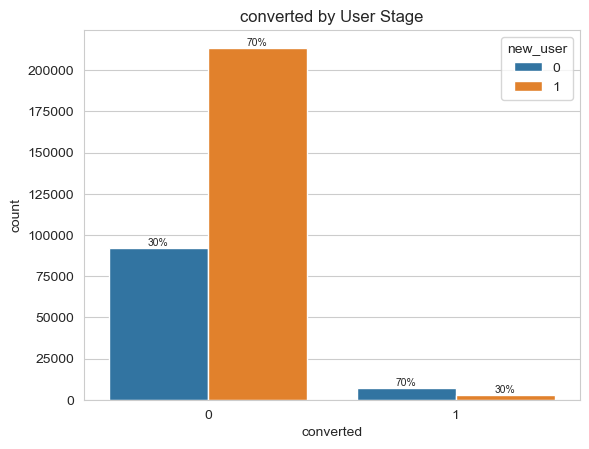

In [59]:
ax=sns.countplot(x='converted',hue='new_user',data=df)
barPerc(df,'converted',ax)
plt.title("converted by User Stage")

In [24]:
#By user stage conversion rate
converted_user_stage=df.groupby('new_user')['converted'].mean().rename('avg_conversion').reset_index()
converted_user_stage

,new_user,avg_conversion
0,0,0.071983
1,1,0.014021


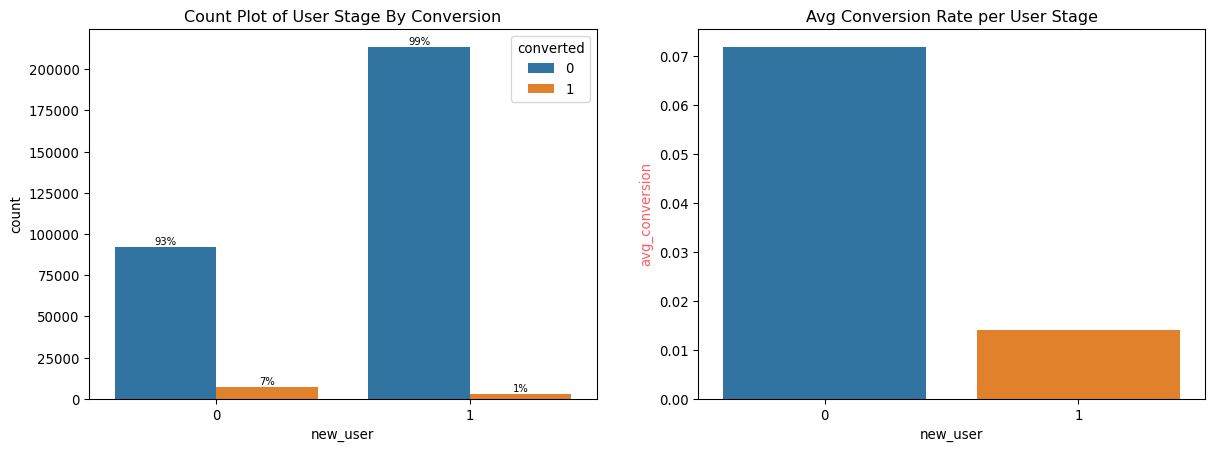

In [27]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5), dpi=96)
axs[0].set_title('Count Plot of User Stage By Conversion')
axs[0].set_ylabel('User Stage')  
axs[0].set_xlabel('Count')

axs[1].set_title('Avg Conversion Rate per User Stage')
axs[1].set_ylabel('Avg Conversion Rate')
axs[1].set_xlabel('User Stage')
axs[1].yaxis.label.set_color('#FD5C64') 

ax=sns.countplot(x='new_user',hue='converted',data=df,ax=axs[0])
barPerc(df,'new_user',ax)

ax=sns.barplot(x='new_user',y='avg_conversion',data=converted_user_stage,ax=axs[1])

#### Marketing Channel

Text(0.5, 1.0, 'Marketing Channel Distribution')

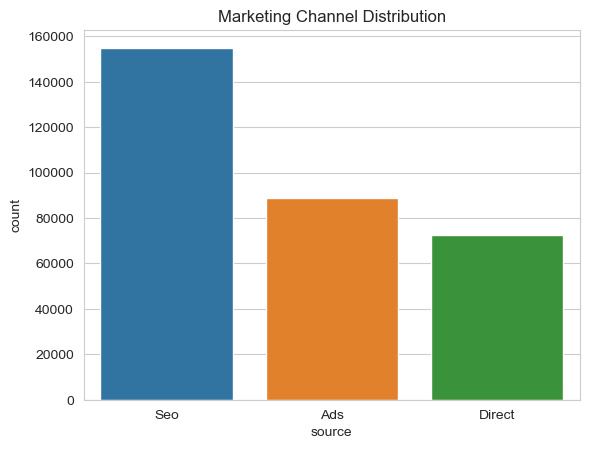

In [23]:
ax=sns.countplot(x='source',data=df,
              order = df['source'].value_counts().index)
plt.title("Marketing Channel Distribution")

In [31]:
df_plot = df.groupby(['source', 'converted']).size().reset_index().pivot(columns='converted', index='source', values=0)
df_plot

converted,0,1
source,,
Ads,85680,3059
Direct,70380,2040
Seo,149940,5099


Text(0.5, 1.0, 'Stacked Bar Chart of Source vs Converted')

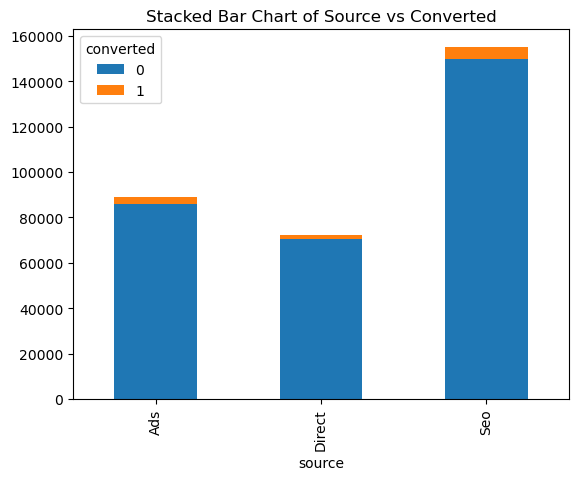

In [88]:
df_plot.plot(kind='bar', stacked=True)
plt.title("Stacked Bar Chart of Source vs Converted")

Text(0.5, 1.0, 'Conversion in Each Marketing Channel')

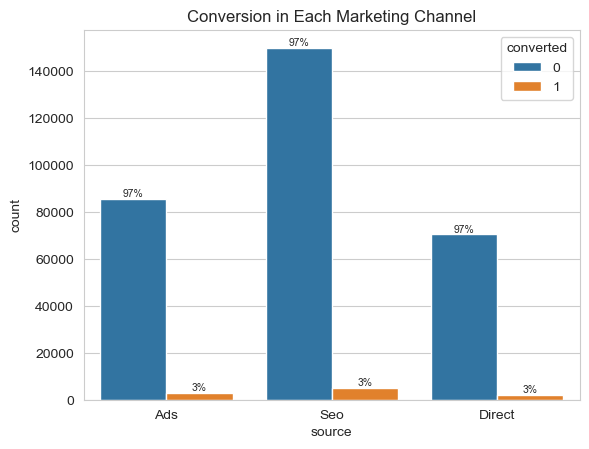

In [25]:
ax=sns.countplot(x='source',hue='converted',data=df)
barPerc(df,'source',ax)
plt.title("Conversion in Each Marketing Channel")

In [28]:
#By user stage conversion rate
converted_source=df.groupby('source')['converted'].mean().rename('avg_conversion').reset_index()
converted_source

,source,avg_conversion
0,Ads,0.034472
1,Direct,0.028169
2,Seo,0.032888


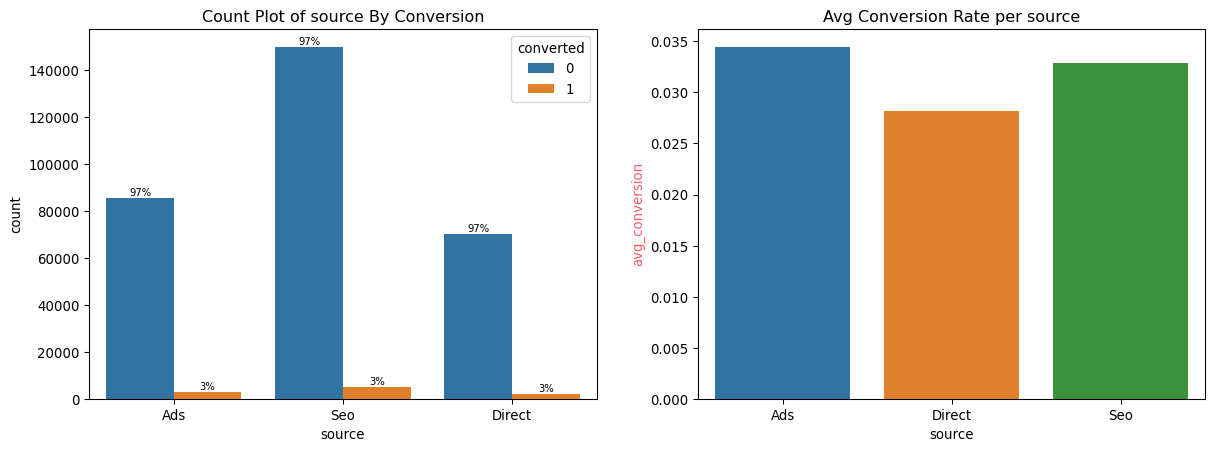

In [29]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5), dpi=96)
axs[0].set_title('Count Plot of source By Conversion')
axs[0].set_ylabel('source')  
axs[0].set_xlabel('Count')

axs[1].set_title('Avg Conversion Rate per source')
axs[1].set_ylabel('Avg Conversion Rate')
axs[1].set_xlabel('source')
axs[1].yaxis.label.set_color('#FD5C64') 

ax=sns.countplot(x='source',hue='converted',data=df,ax=axs[0])
barPerc(df,'source',ax)

ax=sns.barplot(x='source',y='avg_conversion',data=converted_source,ax=axs[1])

## Data Preprocessing

In [43]:
X = df.drop('converted', axis = 1)
y = df['converted'] 

In [44]:
X.head()

,country,age,new_user,source,total_pages_visited
0,UK,25,1,Ads,1
1,US,23,1,Seo,5
2,US,28,1,Seo,4
3,China,39,1,Seo,5
4,US,30,1,Seo,6


In [47]:
#check balance
y.head()
y.mean() #from the y.mean() we can tell this is a skewed dataset, accuracy itself alone will not be a preferred performance measurement. 

0.03225806451612903

### Feature Engineering

In [41]:
import sklearn
import warnings
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score

In [102]:
numeric_features = ["age", "total_pages_visited"]
numeric_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='median')),
     ("scaler", StandardScaler())]
)

categorical_features = ['country', 'new_user', 'source']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)])

### Split the dataset into train and test data

In [103]:
X_prepared=preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(252960, 11) (252960,)
(63240, 11) (63240,)


In [100]:
y_train.mean(),y_test.mean()
#since both ytrain.mean() and ytest.mean() are similar to y.mean(), we can say, the splitting process doesn't import any bias

(0.0323252688172043, 0.03198924731182796)

## Modeling

In [54]:
from sklearn.linear_model import LogisticRegression

Logistic Regression Assumptions:
1. Binary logistic regression requires the dependent variable to be binary.
2. For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
3. Only the meaningful variables should be included.
4. The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
5. The independent variables are linearly related to the log odds.
6. Logistic regression requires quite large sample sizes.

### Grid Search

In [59]:
log_reg_params= {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}

In [60]:
log_reg_grid = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=log_reg_params, cv=10)

In [61]:
log_reg_grid.fit(X_train, y_train)

c:\Users\seagu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\seagu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\seagu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\seagu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Valu

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']})

In [62]:
print(f'Logistic Regression:\n\t *best params: {log_reg_grid.best_params_}\n\t *best score: {log_reg_grid.best_score_}')

Logistic Regression:
	 *best params: {'C': 5, 'penalty': 'l2'}
	 *best score: 0.9861875395319419


Using Optimal values of Hyperparameters

In [63]:
best_log_reg = LogisticRegression(C=5,penalty='l2')

In [65]:
best_log_reg.fit(X_train, y_train)
log_reg_predicted = best_log_reg.predict(X_test)

In [89]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(best_log_reg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.99


Since we are dealing with a skewed dataset, accuracy is not a preferred performance measure for classification. 

### Model Evaluation

In [64]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [91]:
print('Training error =', 100*(1-best_log_reg.score(X_train,y_train)), '%')
print('Testing error', 100*(1-best_log_reg.score(X_test,y_test)), '%')

print(classification_report(y_true=y_test,y_pred=log_reg_predicted))

Training error = 1.3824320050600858 %
Testing error 1.3741302972802072 %
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61217
           1       0.85      0.69      0.76      2023

    accuracy                           0.99     63240
   macro avg       0.92      0.84      0.88     63240
weighted avg       0.99      0.99      0.99     63240



Interpretation: 
1. The precision is the ratio tp / (tp + fp). The precision is the accuracy of the positive predictions.(out of all the data identified as positive, how many of them are actually positive)

2. The recall is the ratio tp / (tp + fn), its also called sensitivity. The recall is intuitively the ability of the classifier to find all the positive samples,the ratio of positive instances that are correctly detected by the classifier (out of all the positive samples, how many of them did the model identified)

3. The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall(if you need a simple way to compare two classifiers.)
- The F1 score favors classifiers that have similar precision and recall. This is not always what you want: in some contexts you mostly care about precision, and in other contexts you really care about recall.

4. The support is the number of occurrences of each class in y_test.

- Out of all the customers identified as converted, only 85% of them actually converted. And, out of all converted cutomers, the model identified 69% of them, which means we classified 31% converted user as non-converted. 
- Our goal of the model is to provide some insights for the marketing and sales team, we hope to better identify whether the cusomer has a better opportunity to convert or not. So, the current recall rate is beareable. However, for example, if we care more about not losing a valued customer, so incorrectly classifing a converted user as non-converted will pay much, we need to lower down the cut-off probability to be 1, which will increase the recall with the price to lower than precision.

Churn Problem:
For the problem I was dealing with, Recall is more important because it's preferable to have a model that does not miss any churns but sometimes classify a non-churns as churns, than a model that does not classify non-churns as churns but misses a lot of churns. In other words, we prefer to be incorrect when classifying a non-churning costumer than when classifying a churning customer.

In [90]:
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,log_reg_predicted)))

Confusion Matrix : 
[[60970   247]
 [  622  1401]]


The result from the confison matrix is telling us that we have 60970+1401 correct predictions and 247+622 incorrect predictions.

In [92]:
1 - y_test.mean()

0.968010752688172

since this is an imbalanced classification problem, if we group every record as 'NOT converted', we can still get 96.80 accuracy (1-y_test.mean()). since our best logistic regression model produces an accurancy as 99.00% on test dataset, which indicates it is a model which makes sense.

In [73]:
# ROC- AUC score
print("Logistic Regression ROC-AUC score  test dataset:  t", roc_auc_score(y_test,log_reg_predicted))

Logistic Regression ROC-AUC score  test dataset:  t 0.8442505054686984


In [74]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

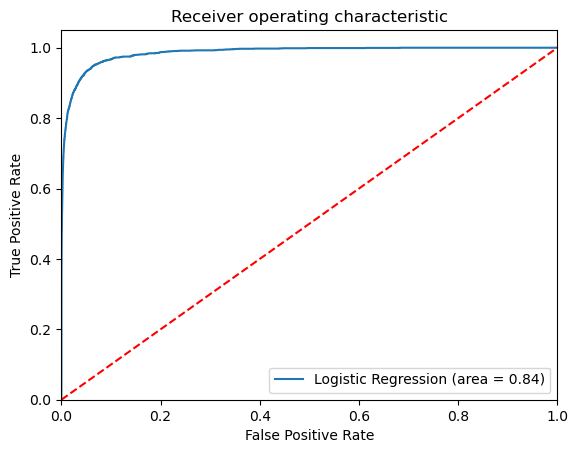

In [77]:
logit_roc_auc = roc_auc_score(y_test,log_reg_predicted)
fpr, tpr, thresholds = roc_curve(y_test, best_log_reg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

 It tells how much the model is capable of distinguishing between classes. 
 Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. 
 By analogy, the Higher the AUC, the better the model is at distinguishing between users converted or not.

# Feature Importance

In [105]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [108]:
get_feature_names(preprocessor)

C:\Users\seagu\AppData\Local\Temp\ipykernel_30828\1809191144.py:30: UserWarning: Transformer imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\seagu\AppData\Local\Temp\ipykernel_30828\1809191144.py:30: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


['num__age',
 'num__total_pages_visited',
 'onehot__x0_China',
 'onehot__x0_Germany',
 'onehot__x0_UK',
 'onehot__x0_US',
 'onehot__x1_0',
 'onehot__x1_1',
 'onehot__x2_Ads',
 'onehot__x2_Direct',
 'onehot__x2_Seo']

In [107]:
feat_importances = pd.DataFrame({"Feature_Name":get_feature_names(preprocessor),"coef":best_log_reg.coef_[0]})
feat_importances = feat_importances[['Feature_Name','coef']]# reorder the columns
feat_importances['importances'] = np.abs( feat_importances['coef'] )
feat_importances.sort_values(by="importances",inplace=True,ascending=False)
feat_importances

C:\Users\seagu\AppData\Local\Temp\ipykernel_30828\1809191144.py:30: UserWarning: Transformer imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\seagu\AppData\Local\Temp\ipykernel_30828\1809191144.py:30: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


,Feature_Name,coef,importances
2,onehot__x0_China,-2.629645,2.629645
1,num__total_pages_visited,2.541228,2.541228
3,onehot__x0_Germany,1.124598,1.124598
4,onehot__x0_UK,0.949371,0.949371
6,onehot__x1_0,0.879592,0.879592
7,onehot__x1_1,-0.878160,0.878160
0,num__age,-0.619108,0.619108
5,onehot__x0_US,0.557107,0.557107
9,onehot__x2_Direct,-0.117311,0.117311
8,onehot__x2_Ads,0.061639,0.061639


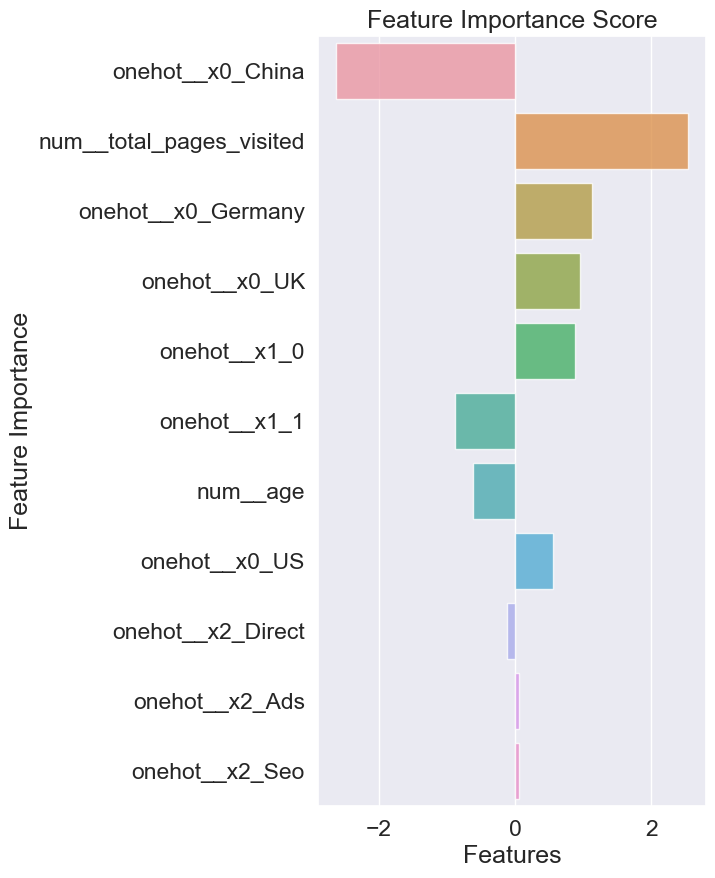

In [110]:
sns.set(font_scale=1.5)
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(5,10))
sns.barplot(feat_importances[0:20].coef,feat_importances[0:20].Feature_Name,alpha=0.8)
plt.title('Feature Importance Score')
plt.ylabel('Feature Importance')
plt.xlabel('Features')
plt.show()

from above model, we can draw below conclusion:

- conversion among Chinese users are very bad. from inspection, we know that there are lot of users coming from China, but their conversion rate is very low. Consider China's economic and population, there is a huge opportunity if we target Chinese users and improve their conversion rate. we should consider whether our website has good Chinese translation and satisfy Chinese users' culture requirement.
- conversion from Germany is good. but inspection, we know that there isn't a lot of users from German. so it's a huge opportuntity for us to target German users. for example, put more advertisement in German.
- Past users have better conversion rate. we should keep touch with them, for example, send promotion email or coupons to past users.
- age is a negative factor. the older the user is, the less likely he/she will convert. then we should figure out why young people loves the web pages and strengthen it. and also find out why older people doesn't like our web pages, and try to correct it.
- total_pages_visited is a positive factor. the longer the user browse our web page, the more likely he/she will convert and buy something. then if we find some user browse a lot and didn't buy anything, we can send email to remaind them.